# Compton polarimeter exercises

## Default units are *MeV* and *cm*

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Polarization impact on asymmetry

Using the equation for an asymmetry evaluate what the level of uncertainty comes from polarization measurement uncertainty (feel free to use pen and paper). Print out this uncertainty for an asymmetry $A=0.05$ a polarization value of $80\%$ and an absolute polarization uncertainty of $3\%$. What is the relative uncertainty on the asymmetry?

In [2]:
A = 0.05
P = 0.8
dP = 0.03
dA = A*dP/P
print("dA = ",dA)
print("dA/A = ", dA/A*100, "%")

dA =  0.001875
dA/A =  3.75 %


### Scattered photon information
Calculate the energy of a 532nm photon in units of MeV

In [3]:
hbarc = 1.9732858E-11
pi = 3.141592653589793
laser_lambda = 532e-7
E_laser = hbarc*2*pi/laser_lambda
print("photon energy = ",E_laser)

photon energy =  2.3305489371101722e-06


Calculate the maximum energy of the scattered photon:

In [4]:
E_beam = 5000
m_electron = 0.51099006
gamma = E_beam/m_electron
a = 1.0/(1 + 4*gamma*E_laser/m_electron)
E_g_max = 4*gamma**2*a*E_laser
print("Maximum photon energy = ",E_g_max)

Maximum photon energy =  757.355762386553


Calculate the angle for which the scattered photon energy is half of the maximum energy:

In [5]:
Theta_half = np.sqrt(1/(a*gamma**2))
print("E_g_max/2 angle (deg) = ",Theta_half*180/pi)

E_g_max/2 angle (deg) =  0.006356700858973076


Calculate the radial position of this photon 30 meters from the interaction region:

In [6]:
cone_size_30m = np.tan(Theta_half)*3000
print("R after 30 m = ",cone_size_30m,"cm")

R after 30 m =  0.33283608002590803 cm


### Cross-section and asymmetries

Define a function to calculate the Compton cross-section as a function of the scattered photon energy ($\rho$). Print the cross-section for half of the maximum photon energy.

In [7]:
re=2.818E-13
def compton_xsec(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))
 dsig = 2.*pi*re**2*a*(first+1.0+second**2)
 return dsig
print("Cross section for half energy = ", compton_xsec(0.5))

Cross section for half energy =  4.288483334832458e-25


Plot the Compton cross-section for the entire photon energy range:

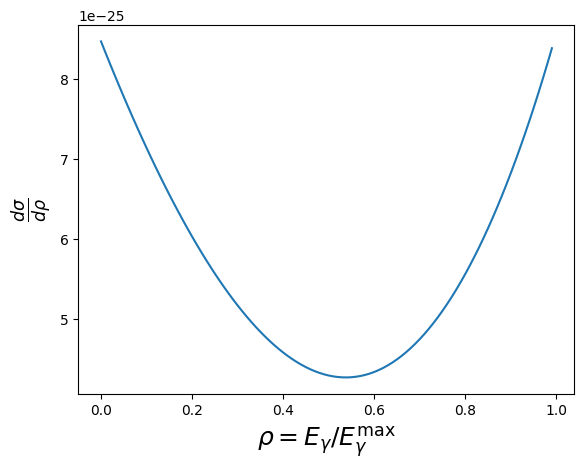

In [8]:
rr = np.arange(0,1.0,0.01)
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$\frac{d\sigma}{d\rho}$',fontsize=18)
plt.plot(rr, compton_xsec(rr))

Define a function to calculate the longitudinal asymmetry as a function of $\rho$ and calculate the asymmetry for half of the maximum photon energy:

In [9]:
def compton_A_long(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))

 term1 = 1.0/(first+1.0+second**2)
 term2 = 1.0-rho*(1+a)
 term3 = 1.0-1.0/(1.0-rho*(1.-a))**2

 asy=term1*term2*term3

 return asy

print("Longitudinal asymmetry for half energy = ", compton_A_long(0.5))

Longitudinal asymmetry for half energy =  -0.01275548205649403


Plot the longitudinal asymmetry as a function of $\rho$:

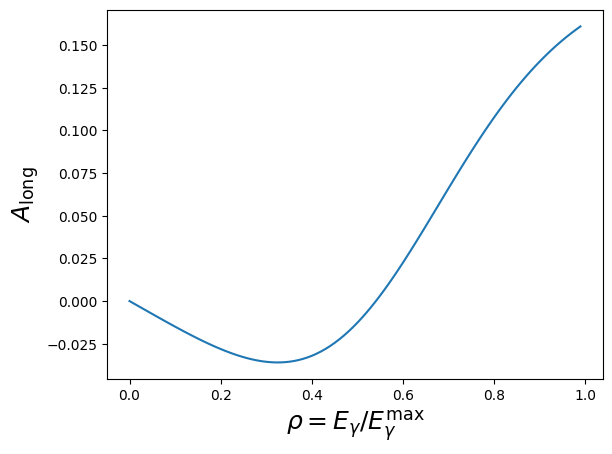

In [10]:
rr = np.arange(0,1.0,0.01)
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$A_\mathrm{long}$',fontsize=18)
plt.plot(rr, compton_A_long(rr))

Define a function to calculate the transverse asymmetry as a function of $\rho$ (at $phi=0$) and calculate the asymmetry for half of the maximum photon energy:

In [11]:
# this is the phi-independent term - away from electron polarization direction, need *cos(phi)
def compton_A_perp(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))

 term1 = 1.0/(first+1.0+second**2)
 term2 = rho*(1-a)
 term3 = np.sqrt(4*a*rho*(1-rho))/(1-rho*(1-a))

 asy = term1*term2*term3
 return asy

print("Transverse asymmetry for half energy = ", compton_A_perp(0.5))

Transverse asymmetry for half energy =  0.07451809329701582


Plot the longitudinal asymmetry as a function of $\rho$ and $\phi=0$:

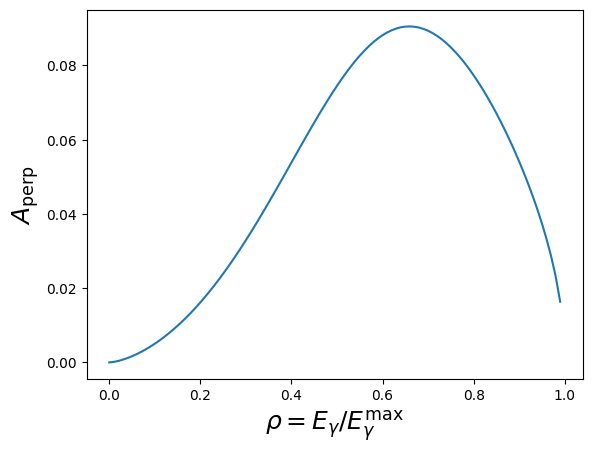

In [12]:
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$A_\mathrm{perp}$',fontsize=18)
plt.plot(rr, compton_A_perp(rr))

### Luminosities and laser type

Calculate the luminosity of a CW laser with the given parameters below:

In [13]:
Ibeam=1
e=1.6022E-19
c=2.9979E10

power_laser = 5
sigmalaser=100E-4
siglaserz=23E-12*c

alphac=10E-3
alpha=alphac/2.0

sigmabeam=300E-4
sigbeamz = 23E-12*c

Ne = Ibeam/e/c
Nphot = power_laser/(e*1E6*E_laser*c)
LumiCW = c*(1.0 + np.cos(alphac))*Ne*Nphot/(np.sin(alphac)*np.sqrt(2*pi)*np.sqrt(sigmabeam**2 + sigmalaser**2))
print('Luminosity for CW laser/beam (small crossing angle): ', LumiCW)

Luminosity for CW laser/beam (small crossing angle):  7.033923214036582e+30


Calculate the luminosity of a pulsed laser with the given parameters below:

In [14]:
fbeam=100E6
Nep = Ibeam/e/fbeam
flas=100E6
fcoll=78000

Nphotp = power_laser/(e*1E6*E_laser*flas)

Lumi = Nep*Nphotp*np.cos(alpha)/2/pi*1/np.sqrt(sigmabeam**2+sigmalaser**2)*1/np.sqrt((sigmabeam**2+sigmalaser**2)*np.cos(alpha)**2+(siglaserz**2+sigbeamz**2)*np.sin(alpha)**2)
print('Luminosity for one pulse (small crossing angle): ', Lumi)
print('Luminosity for Pulsed laser/beam (small crossing angle): ', Lumi*flas)
print('Luminosity for Pulsed laser colliding with one beam bunch (small crossing angle): ', Lumi*fcoll)

Luminosity for one pulse (small crossing angle):  1.314609642805983e+24
Luminosity for Pulsed laser/beam (small crossing angle):  1.314609642805983e+32
Luminosity for Pulsed laser colliding with one beam bunch (small crossing angle):  1.0253955213886668e+29


Calculate the rate of scattered photons for a single bunch collision asumming a $\rho_{min}=E_{laser}/E_{\gamma max}$:

In [15]:
rhomin = E_laser/E_g_max
xsect = integrate.quad(lambda rho: compton_xsec(rho),rhomin,1.0)
rate = xsect[0]*Lumi*fcoll
print('Backscattered photon rate (Hz)', rate)

Backscattered photon rate (Hz) 58336.933178552485


### Measurement times

Using the longitudinal asymmetry function from above calculate the average asymmetry and the time it takes to reach 1% statististical precision for this measurement:

In [16]:
dP=0.01
P=0.8
num = integrate.quad(lambda rho: compton_A_long(rho)*compton_xsec(rho),rhomin,1.0)
A_avg = num[0]/xsect[0]
t_avg = 1.0/(rate*dP**2*P**2*A_avg**2)
print('Average longitudinal asymmetry: ', A_avg)
print('Time for 1% measurement (s): ', t_avg)

Average longitudinal asymmetry:  0.03427976755269462
Time for 1% measurement (s):  227.929582570587
